## 介绍

这次练习中，我们将使用葡萄酒质量数据集。该数据集包含葡萄酒的各种化学性质，如酸度、糖分、PH值和酒精含量等，还包括两列分别表示葡萄酒的质量（3-9，越高越好）和酒的颜色（红或者白）。数据保存在`Wine_Quality_Data.csv`文件中。

## 第一步：导入与处理数据

* 导入数据
* 绘制数据集的`pairplot`
* 用`color`列创建目标变量`y`，`y`为只取0/1二值的列，1表示“red”
* 计算每列与`y`的相关性，并显示成一个柱形图
* 挑选出与`y`最相关（相关性的绝对值最大）的两列生成`X`
* 用MinMaxScaler缩放`X`。注意：缩放后输出的是一个np.array，将它重新变成一个DataFrame

In [1]:
# read Wine_Quality_Data.csv into a DataFrame

import pandas as pd
data = pd.read_csv("Wine_Quality_Data.csv")
data.head()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality color  
0      9.4        5   red  
1      9.8        5   red  
2      9.8        5   red  
3      9.8        6   red  
4      9.4        5   red

d:\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


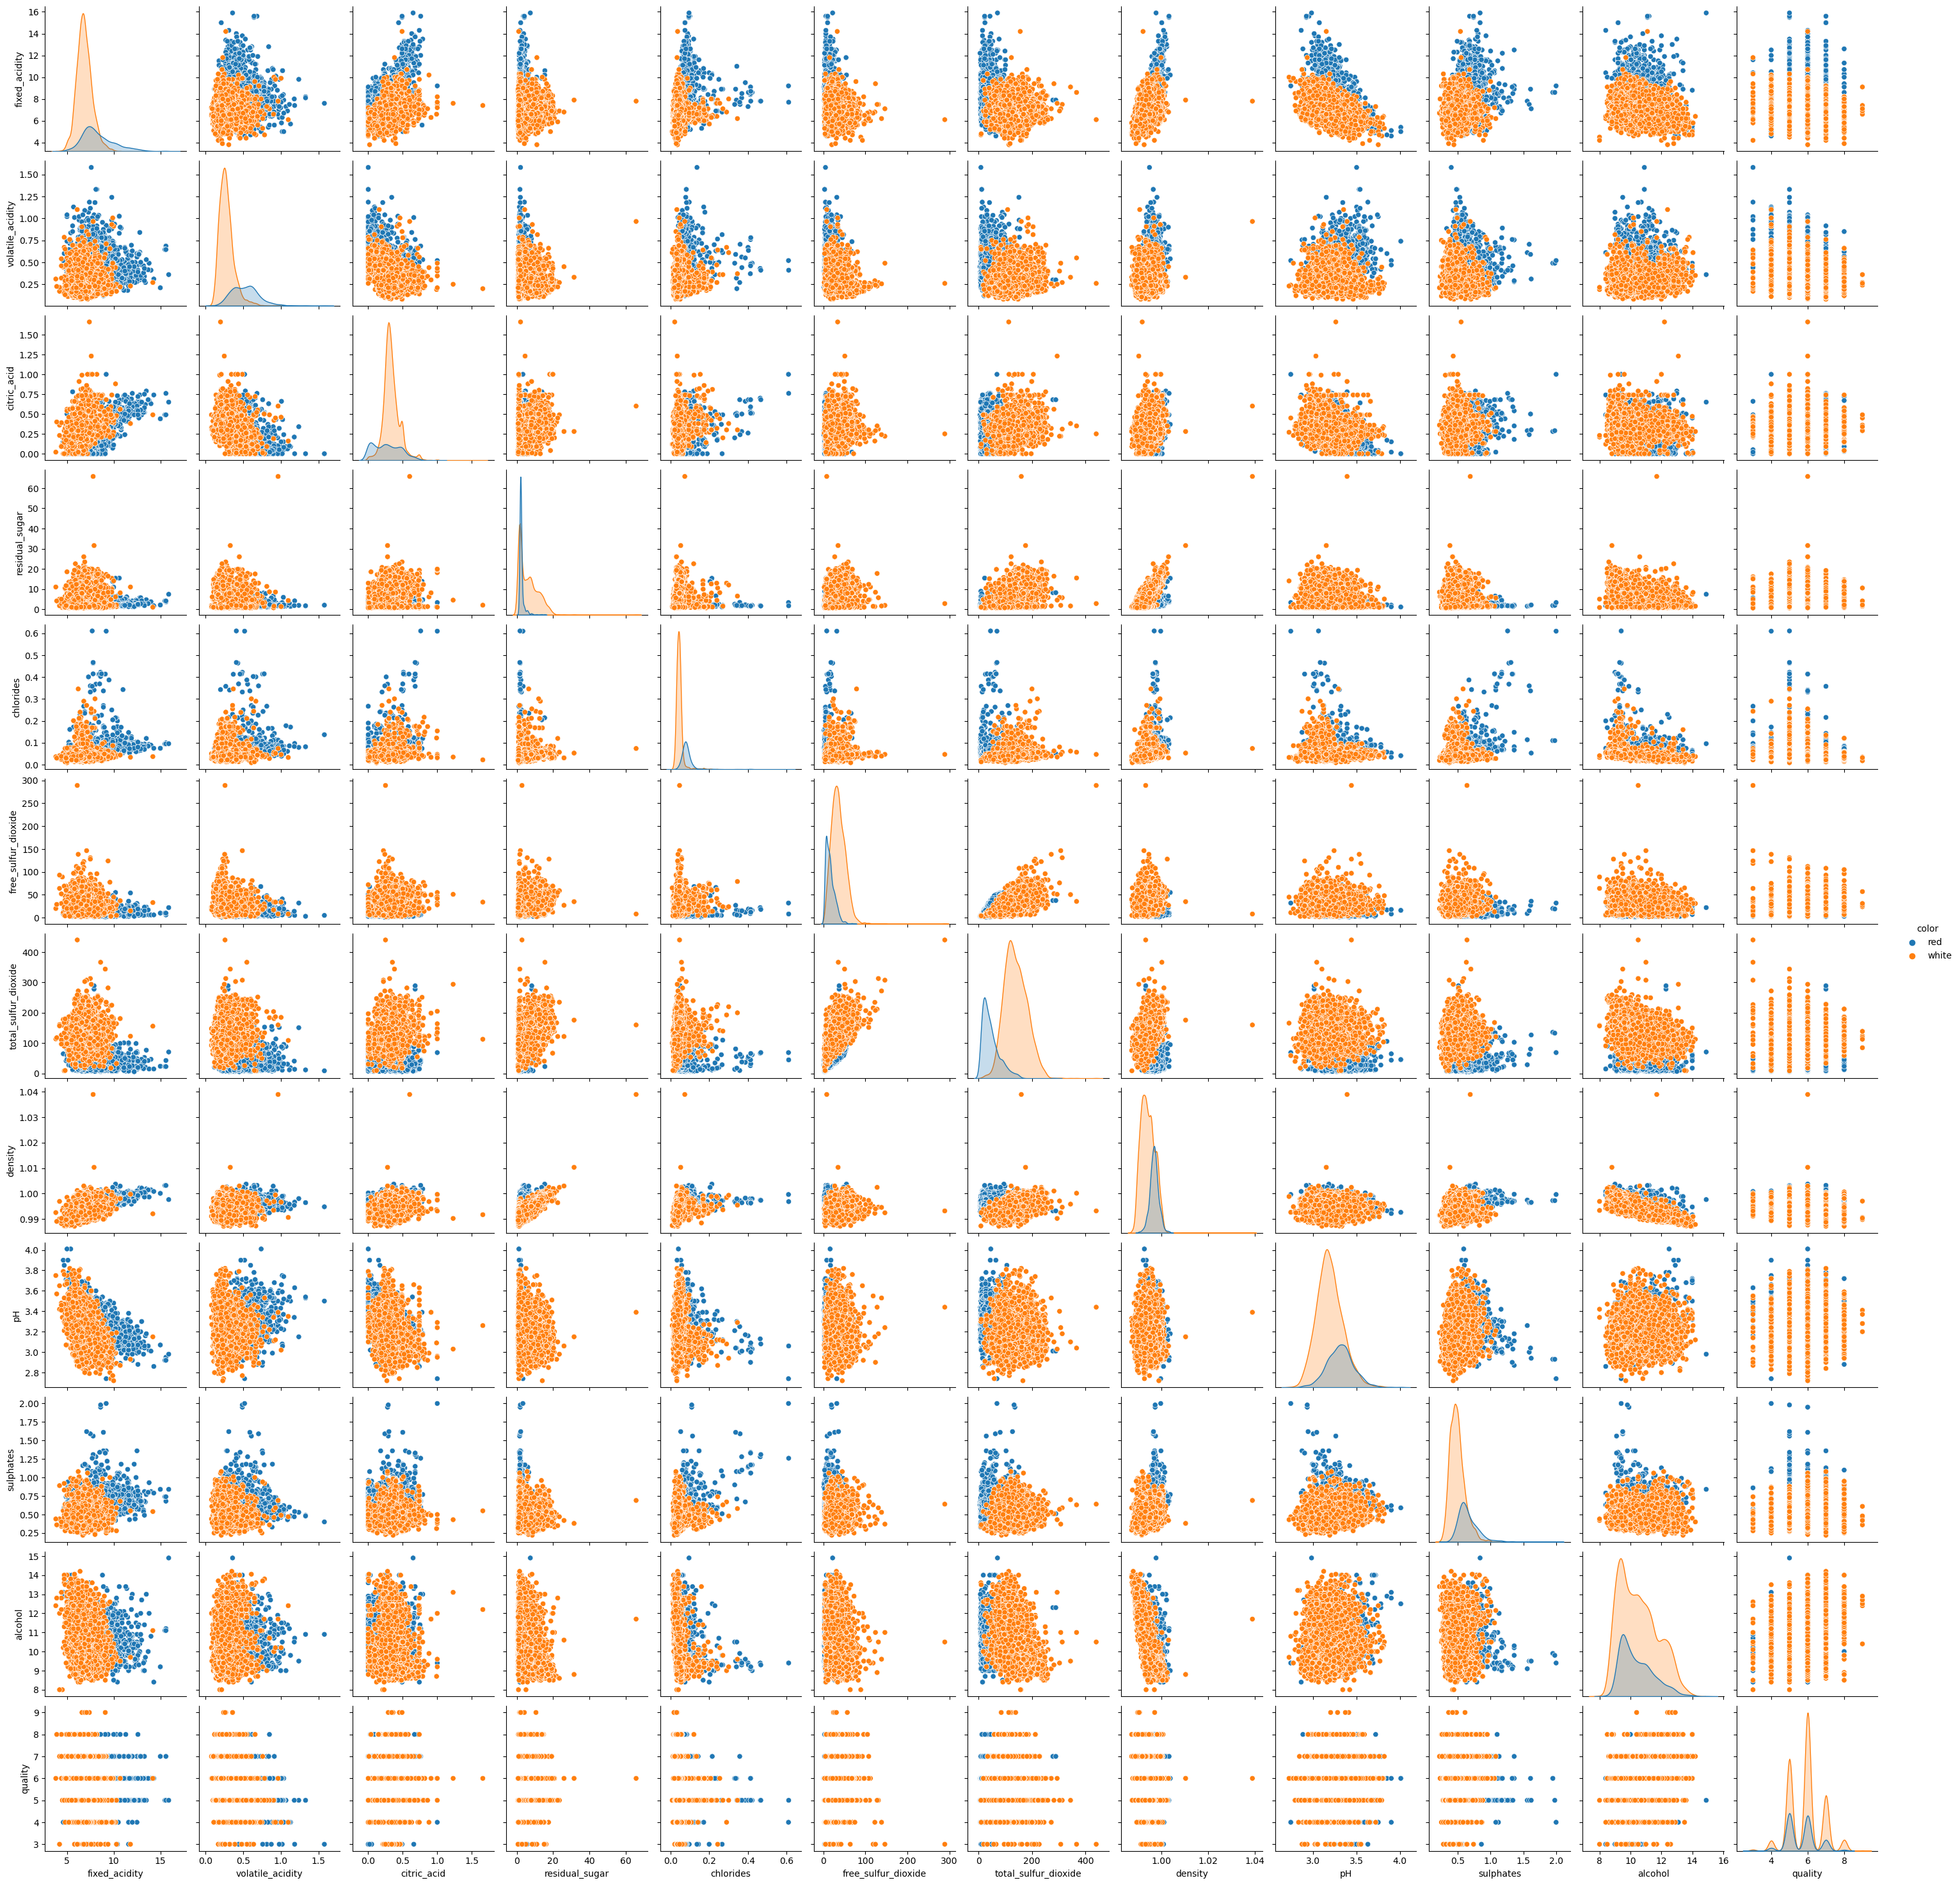

In [2]:
# draw pairplot

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.pairplot(data, hue='color')

In [3]:
# create y

y = data.color.map(lambda x: 1 if x=='red' else 0)

In [4]:
# compute correlation of each column with "color"

fields = list(data.columns[:-1])
correlations = data[fields].corrwith(y)
correlations.sort_values(inplace=True)
correlations

total_sulfur_dioxide   -0.700357
free_sulfur_dioxide    -0.471644
residual_sugar         -0.348821
citric_acid            -0.187397
quality                -0.119323
alcohol                -0.032970
pH                      0.329129
density                 0.390645
fixed_acidity           0.486740
sulphates               0.487218
chlorides               0.512678
volatile_acidity        0.653036
dtype: float64

<Axes: >

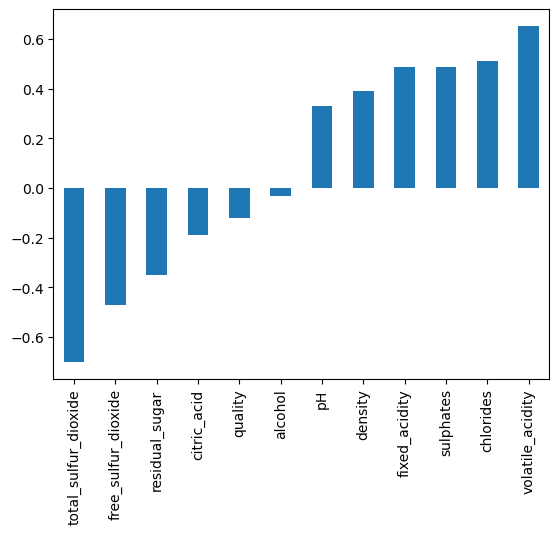

In [5]:
correlations.plot(kind='bar')

In [7]:
# create X

fields = correlations.map(abs).sort_values().iloc[-2:].index
print(fields)

X = data[fields]

Index(['volatile_acidity', 'total_sulfur_dioxide'], dtype='object')


In [9]:
# use MinMaxScaler to scale X
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler(feature_range=(0, 1))

X_scaled = mms.fit_transform(X)

X = pd.DataFrame(X_scaled)

print(X)


             0         1
0     0.413333  0.064516
1     0.533333  0.140553
2     0.453333  0.110599
3     0.133333  0.124424
4     0.413333  0.064516
...        ...       ...
6492  0.086667  0.198157
6493  0.160000  0.373272
6494  0.106667  0.241935
6495  0.140000  0.239631
6496  0.086667  0.211982

[6497 rows x 2 columns]


## 第二步：线性SVC

训练LinearSVC分类器，绘制并观察其决策边界（可以尝试多种不同的参数设置）。绘制决策边界的函数参考了sklearn文档中的[例子](http://scikit-learn.org/stable/auto_examples/svm/plot_iris.html#sphx-glr-auto-examples-svm-plot-iris-py)。 

In [20]:
# Helper function to plot a decision boundary.
import numpy as np
def plot_decision_boundary(clf, X, y_color, h=0.01):
    # Set min and max values and generate a grid of points with gap h between them
    x_min, x_max = X[:, 0].min()-.1, X[:, 0].max()+.1
    y_min, y_max = X[:, 1].min()-.1, X[:, 1].max()+.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    # Predict the value for the whole gid
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot the contour and the training examples
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.contourf(xx, yy, Z, cmap=plt.cm.autumn_r, alpha=0.3)
    ax.scatter(X[:, 0], X[:, 1], c=y_color, cmap=plt.cm.autumn_r, alpha=1)
    ax.set(xlabel=fields[0], ylabel=fields[1], title=str(clf))

In [21]:
# Pick 400 samples from X and get the corresponding y value. This is because original dataset is too large and it produces a crowded plot.
X_sample = X.sample(400, random_state=45)
y_sample = y.loc[X_sample.index]
# create y_color so that it has the value "red" for 1 and 'yellow' otherwise.
y_color = y_sample.map(lambda r: 'red' if r == 1 else 'yellow')

d:\Anaconda\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\wq\AppData\Local\Temp\ipykernel_2996\2761895770.py:16: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X[:, 0], X[:, 1], c=y_color, cmap=plt.cm.autumn_r, alpha=1)


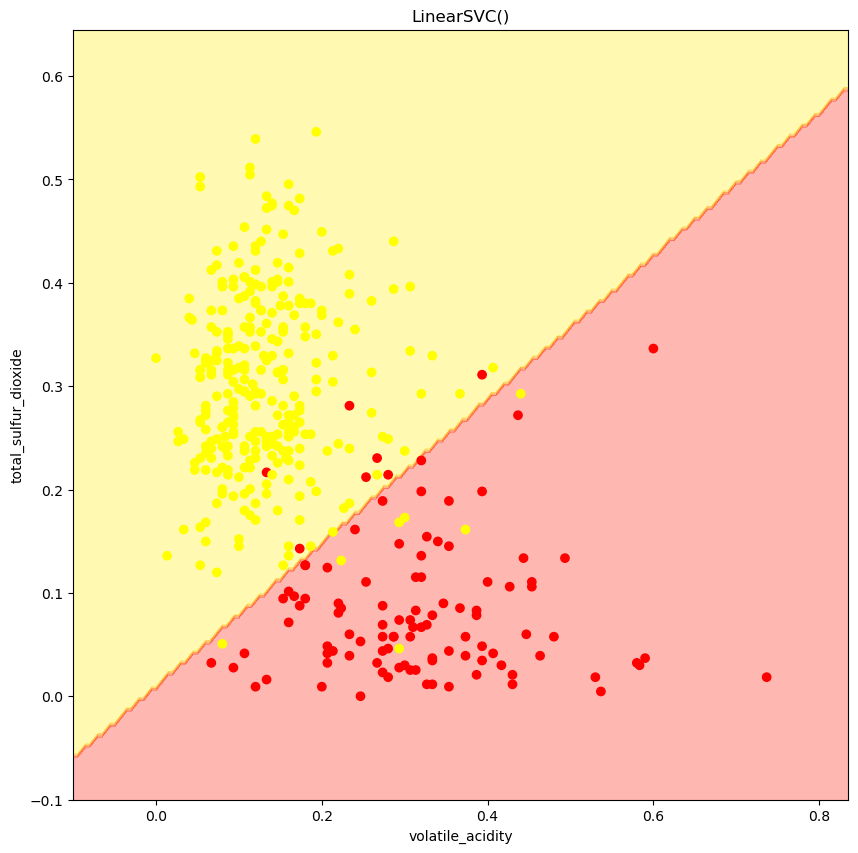

In [22]:
# plot the decision boundary for LinearSVC
from sklearn.svm import LinearSVC

lsvc = LinearSVC()
lsvc.fit(X, y)

plot_decision_boundary(lsvc, X_sample.values, y_color.values, h=0.005)

# from sklearn.inspection import DecisionBoundaryDisplay

# disp = DecisionBoundaryDisplay.from_estimator(lsvc, X_sample, response_method="predict", xlabel=fields[0], ylabel=fields[1], alpha=0.5)

# disp.ax_.scatter(X_sample.iloc[:, 0], X_sample.iloc[:, 1], c=y_color, edgecolor="black")
# disp.ax_.set_xlim(X_sample.iloc[:, 0].min()-.1, X_sample.iloc[:, 0].max()+.1)
# disp.ax_.set_ylim(X_sample.iloc[:, 1].min()-.1, X_sample.iloc[:, 1].max()+.1)
# disp.figure_.set_size_inches(8,8)

## 第三步：高斯核函数SVC

训练使用高斯核函数的SVC分类器，绘制并观察其决策边界随不同参数值的变化。
* 用以下不同的`gamma`值分别创建高斯核函数SVC分类器，绘制并观察它们的决策边界：  
`gammas = [.5, 1, 2, 10]`
* 保持`gamma`值不变（等于2），用以下不同的`C`值创建高斯核函数SVC分类器，绘制并观察它们的决策边界：  
`Cs = [.1, 1, 10]`

C:\Users\wq\AppData\Local\Temp\ipykernel_2996\2761895770.py:16: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X[:, 0], X[:, 1], c=y_color, cmap=plt.cm.autumn_r, alpha=1)
C:\Users\wq\AppData\Local\Temp\ipykernel_2996\2761895770.py:16: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X[:, 0], X[:, 1], c=y_color, cmap=plt.cm.autumn_r, alpha=1)
C:\Users\wq\AppData\Local\Temp\ipykernel_2996\2761895770.py:16: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X[:, 0], X[:, 1], c=y_color, cmap=plt.cm.autumn_r, alpha=1)
C:\Users\wq\AppData\Local\Temp\ipykernel_2996\2761895770.py:16: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X[:, 0], X[:, 1], c=y_color, cmap=plt.cm.autumn_r, alpha=1)


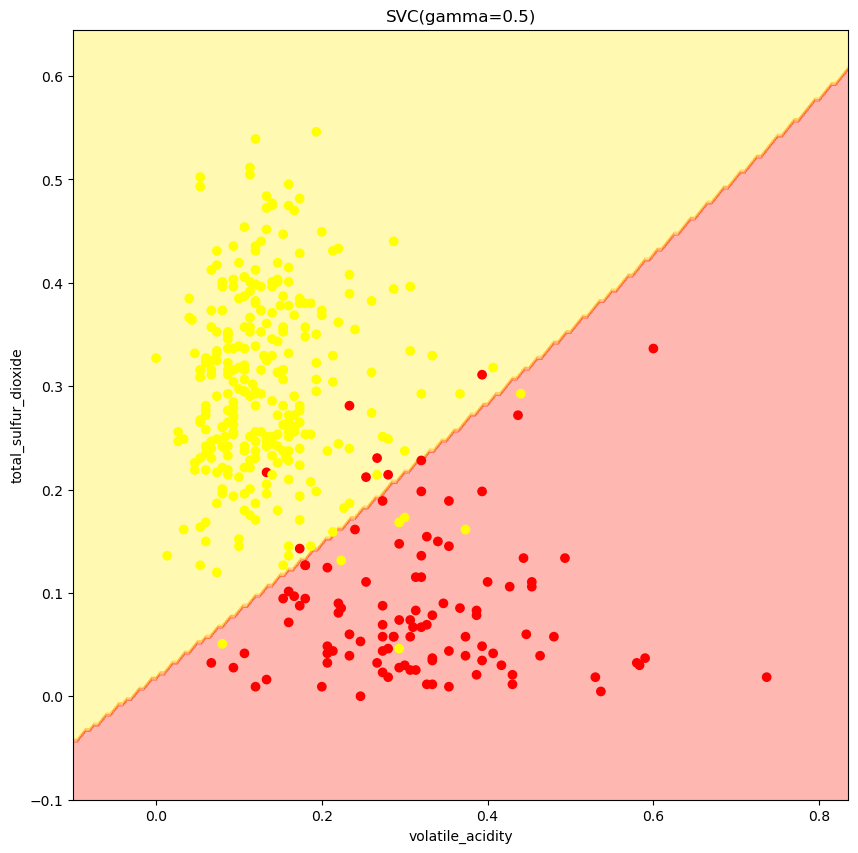

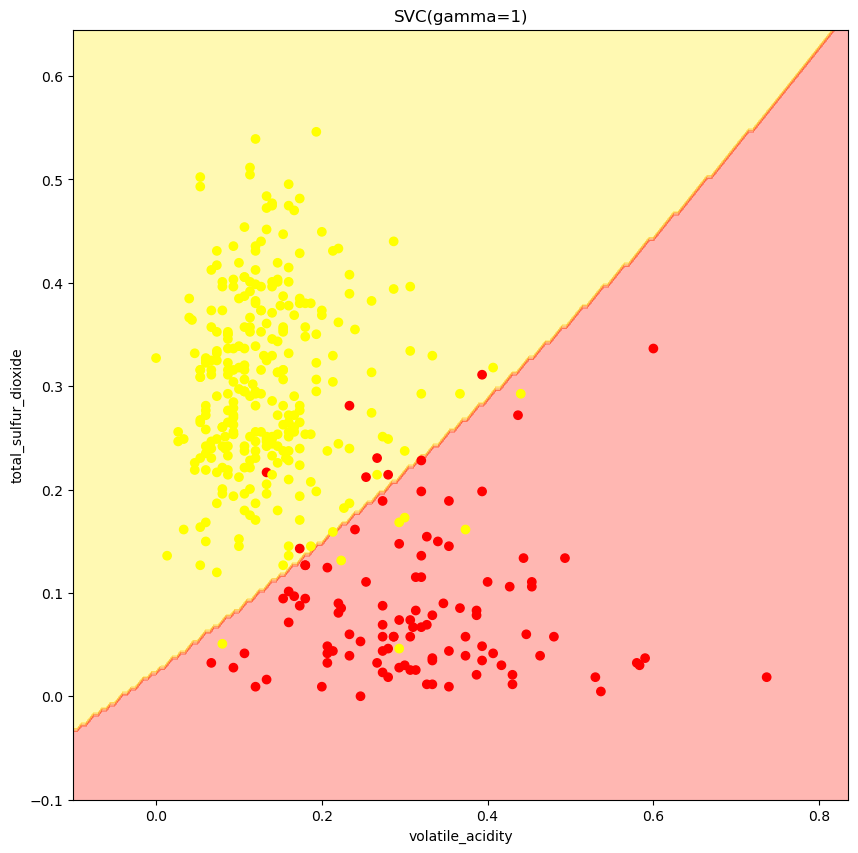

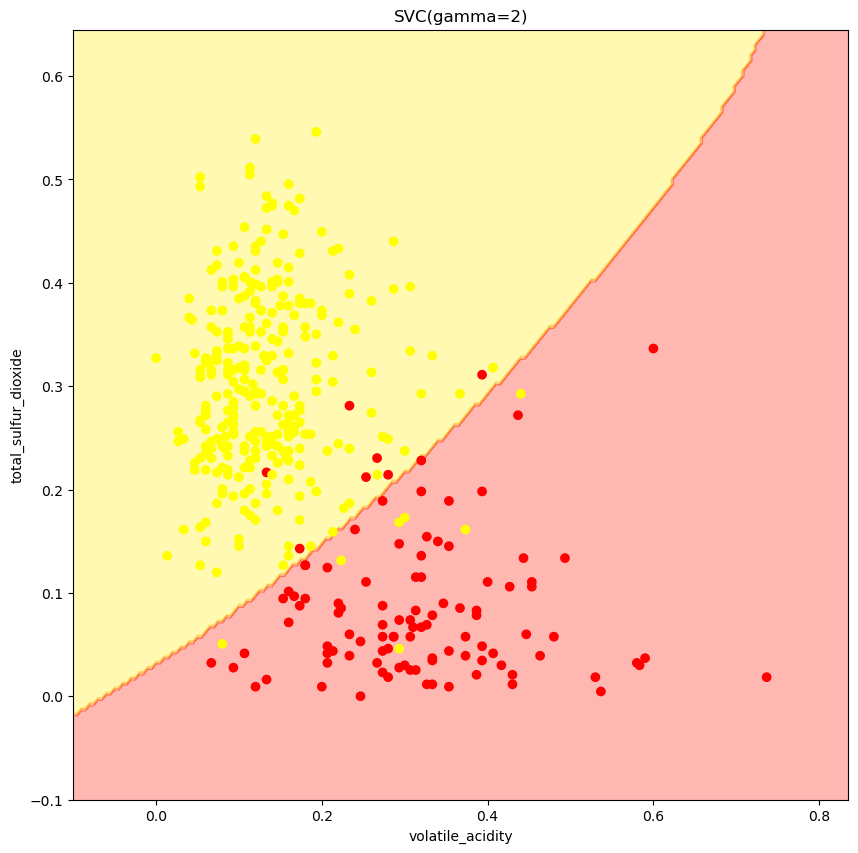

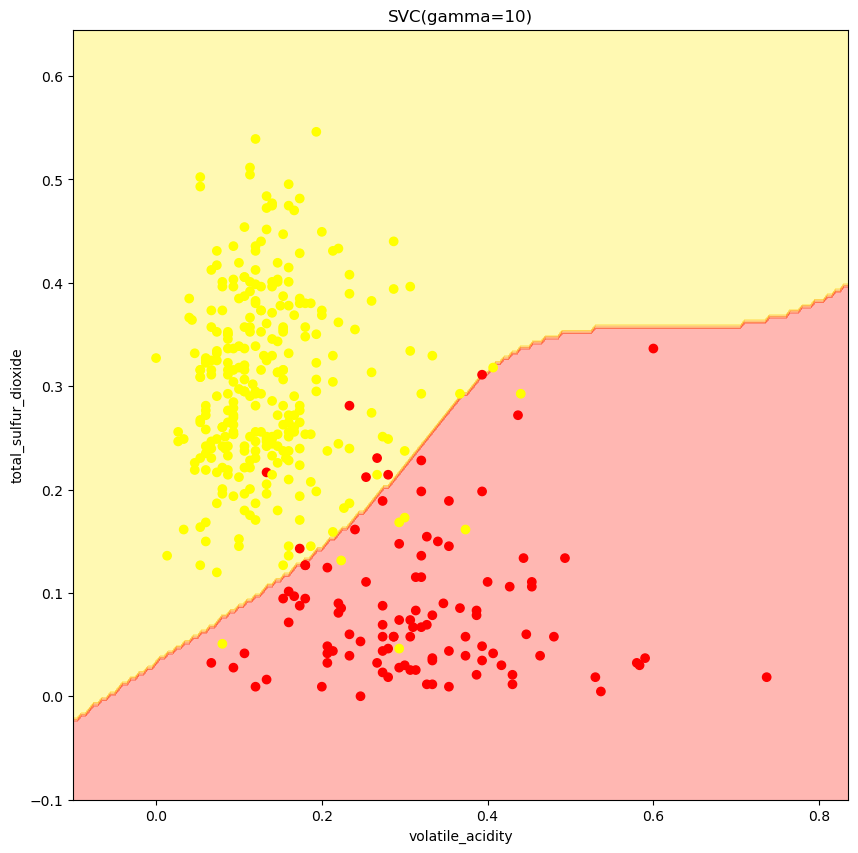

In [23]:
from sklearn.svm import SVC

gammas = [.5, 1, 2, 10]
for gamma in gammas:
    svc_Gaussian = SVC(kernel='rbf', gamma=gamma)
    svc_Gaussian.fit(X, y)

    plot_decision_boundary(svc_Gaussian, X_sample.values, y_color.values, h=0.005)
    # disp = DecisionBoundaryDisplay.from_estimator(svc_Gaussian, X_sample, response_method="predict", xlabel=fields[0], ylabel=fields[1], alpha=0.5)
    # disp.ax_.scatter(X_sample.iloc[:, 0], X_sample.iloc[:, 1], c=y_color, edgecolor="black")
    # disp.ax_.set_xlim(X_sample.iloc[:, 0].min()-.1, X_sample.iloc[:, 0].max()+.1)
    # disp.ax_.set_ylim(X_sample.iloc[:, 1].min()-.1, X_sample.iloc[:, 1].max()+.1)
    # disp.figure_.set_size_inches(8,8)

C:\Users\wq\AppData\Local\Temp\ipykernel_2996\2761895770.py:16: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X[:, 0], X[:, 1], c=y_color, cmap=plt.cm.autumn_r, alpha=1)
C:\Users\wq\AppData\Local\Temp\ipykernel_2996\2761895770.py:16: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X[:, 0], X[:, 1], c=y_color, cmap=plt.cm.autumn_r, alpha=1)
C:\Users\wq\AppData\Local\Temp\ipykernel_2996\2761895770.py:16: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X[:, 0], X[:, 1], c=y_color, cmap=plt.cm.autumn_r, alpha=1)


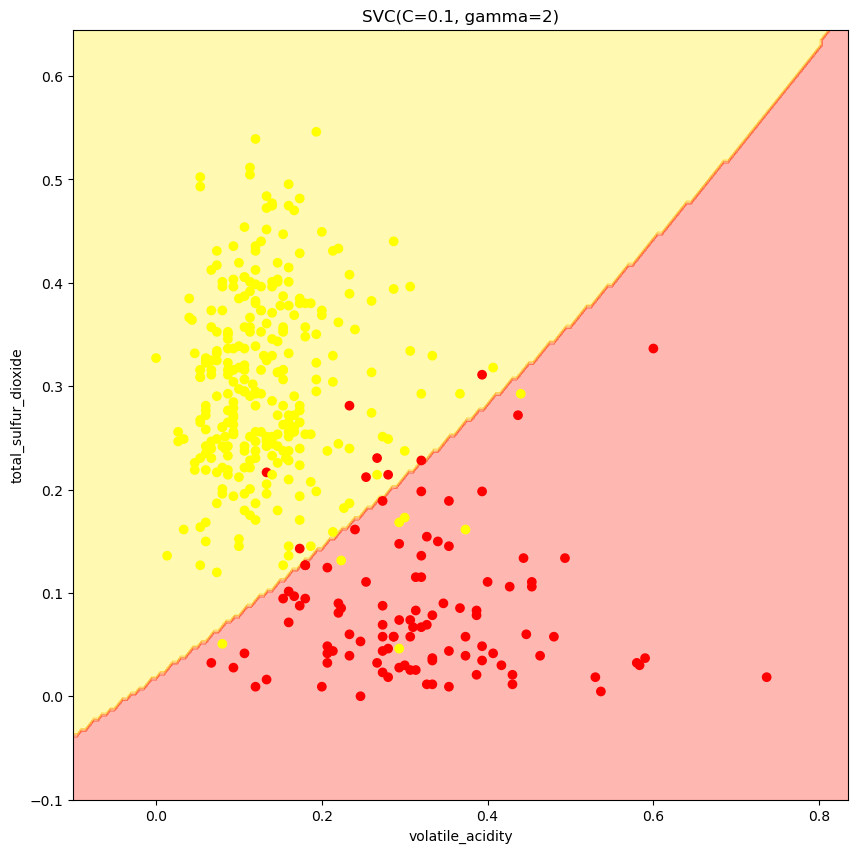

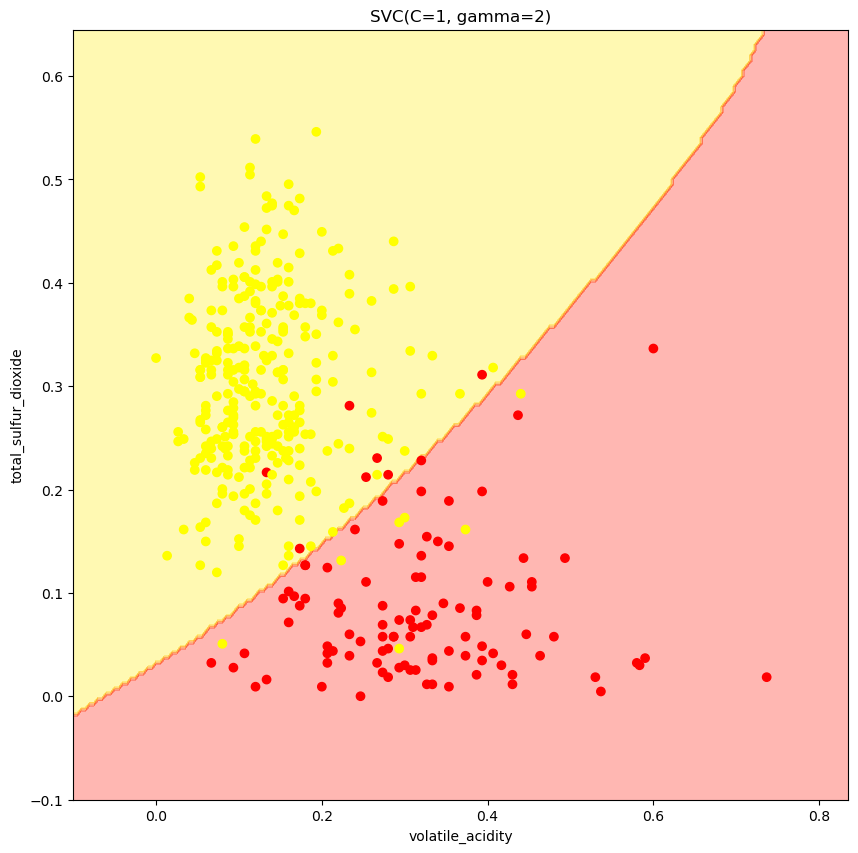

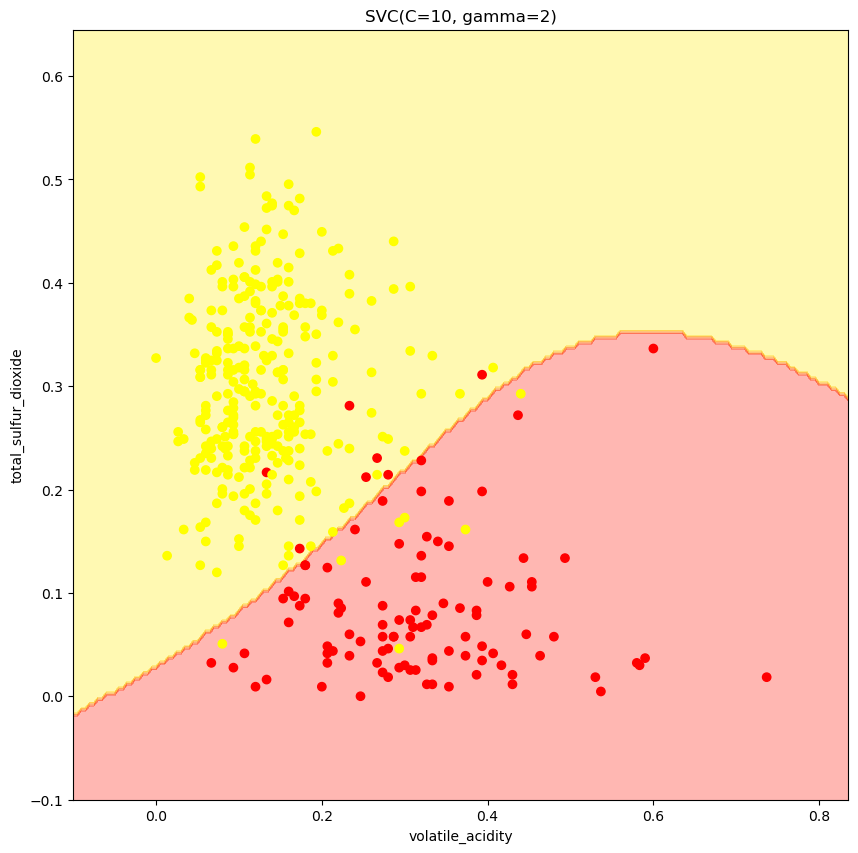

In [24]:
# hold gamma=2, plot decision boundaries for different Cs.
Cs = [.1, 1, 10]
for C in Cs:
    svc_Gaussian = SVC(kernel='rbf', gamma=2, C = C)
    svc_Gaussian.fit(X, y)
    plot_decision_boundary(svc_Gaussian, X_sample.values, y_color.values, h=0.005)

    # disp = DecisionBoundaryDisplay.from_estimator(svc_Gaussian, X_sample, response_method="predict", xlabel=fields[0], ylabel=fields[1], alpha=0.5)
    # disp.ax_.scatter(X_sample.iloc[:, 0], X_sample.iloc[:, 1], c=y_color, edgecolor="black")
    # disp.ax_.set_xlim(X_sample.iloc[:, 0].min()-.1, X_sample.iloc[:, 0].max()+.1)
    # disp.ax_.set_ylim(X_sample.iloc[:, 1].min()-.1, X_sample.iloc[:, 1].max()+.1)
    # disp.figure_.set_size_inches(8,8)


## 第三步：多项式核函数SVC

训练使用3次方的多项式核函数的SVC分类器，绘制并观察其决策边界随不同参数值的变化：

* 用以下不同的C值创建多项式核函数SVC分类器，绘制并观察它们的决策边界：   
`Cs = [10,20,100,200]`
* 试着找出能产生最佳决策边界的C值

C:\Users\wq\AppData\Local\Temp\ipykernel_2996\2761895770.py:16: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X[:, 0], X[:, 1], c=y_color, cmap=plt.cm.autumn_r, alpha=1)
C:\Users\wq\AppData\Local\Temp\ipykernel_2996\2761895770.py:16: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X[:, 0], X[:, 1], c=y_color, cmap=plt.cm.autumn_r, alpha=1)
C:\Users\wq\AppData\Local\Temp\ipykernel_2996\2761895770.py:16: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X[:, 0], X[:, 1], c=y_color, cmap=plt.cm.autumn_r, alpha=1)
C:\Users\wq\AppData\Local\Temp\ipykernel_2996\2761895770.py:16: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X[:, 0], X[:, 1], c=y_color, cmap=plt.cm.autumn_r, alpha=1)


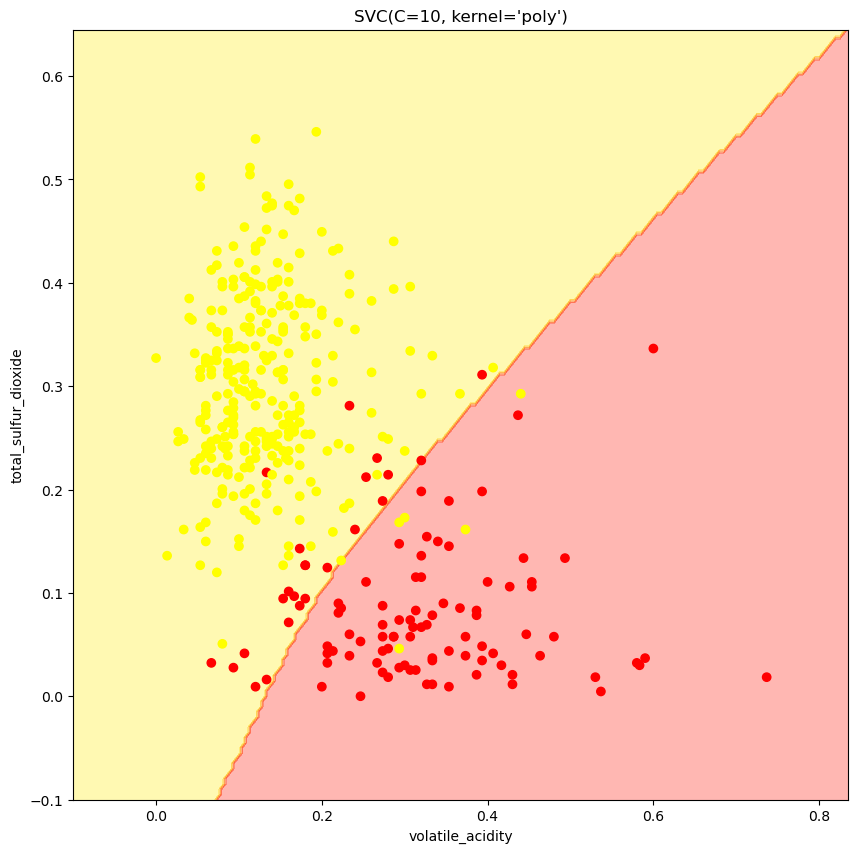

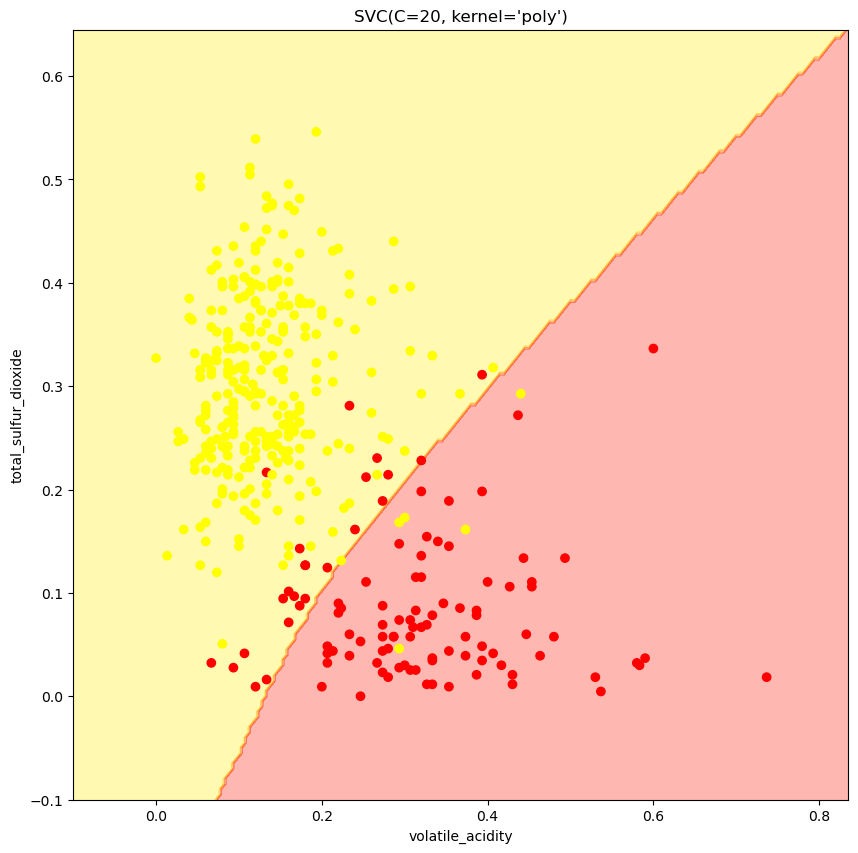

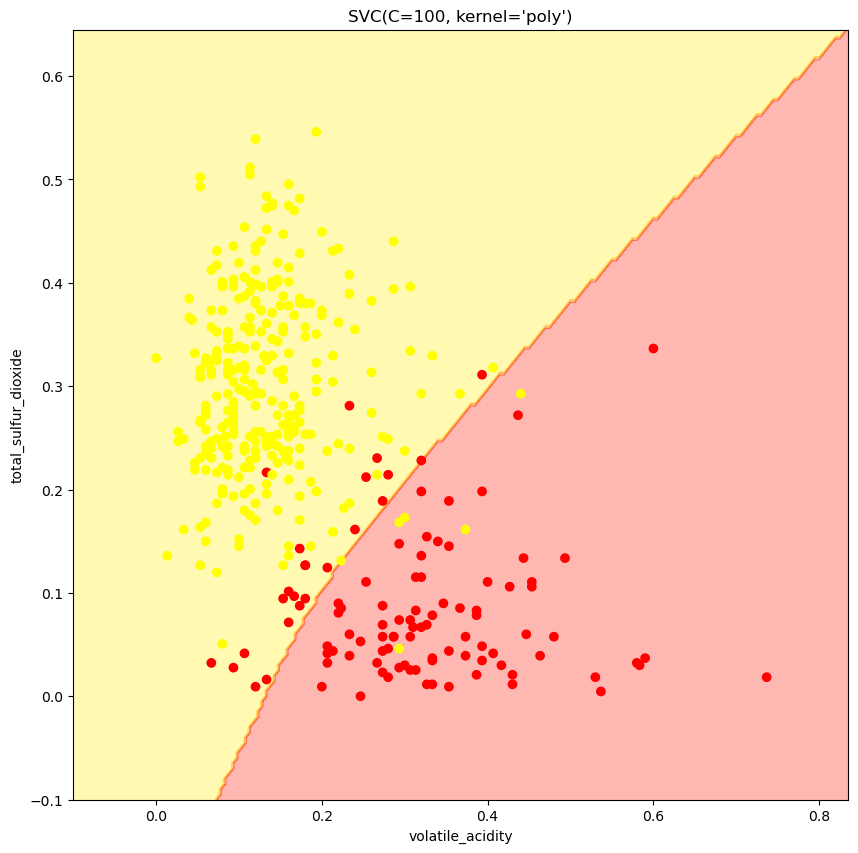

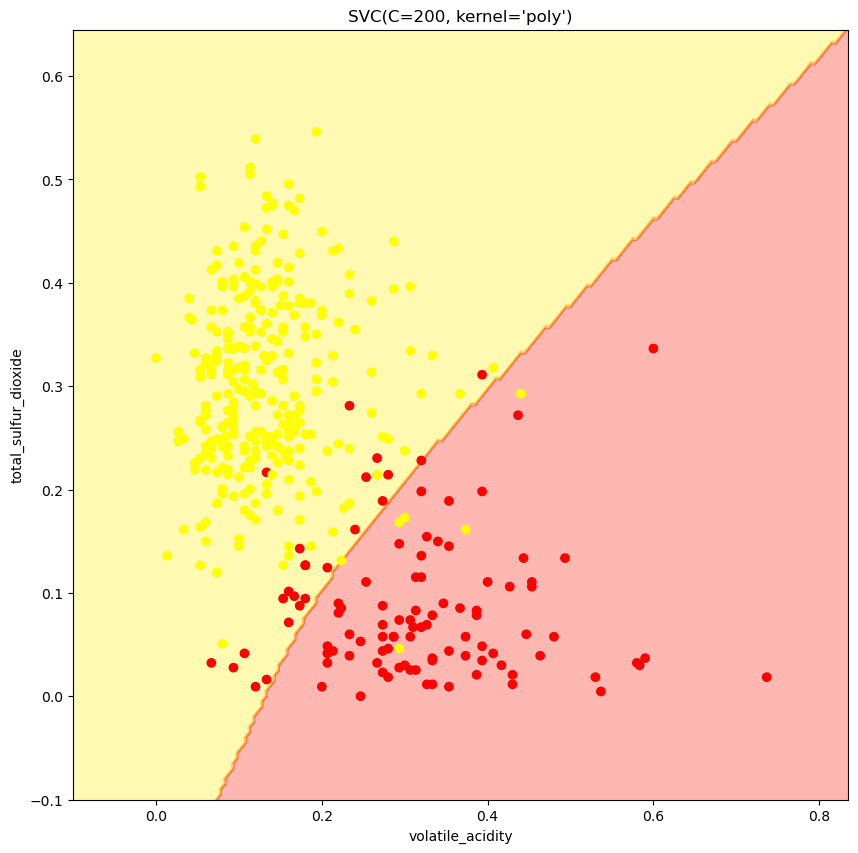

In [25]:
# Try with Polynomial kernel SVC
Cs_new = [10, 20, 100, 200]
for C_new in Cs_new:
    svc_Gaussian = SVC(kernel='poly', degree = 3, C = C_new)
    svc_Gaussian.fit(X, y)
    plot_decision_boundary(svc_Gaussian, X_sample.values, y_color.values, h=0.005)


## 第四步：Nystroem+SGD

比较径向基核函数的SVC与Nystroem+SGD方法的训练速度。使用Jupyter Notebook提供的魔术命令 **`%timeit`** 输出一个代码单元的运行时间。

* 恢复最初的葡萄酒质量数据
* 从“color”列生成`y`，其他列生成`X`
* 用`%%timeit`输出一个径向基核函数SVC分类器的训练时间
* 用`%%timeit`输出下面操作的运行时间：用Nystroem fit_transform数据，然后训练一个SGDClassifier

Nystroem+SGD一般会更快一些，尤其是数据集越大时优势越明显。

* 把X复制5份并串接起来，生成一个五倍大的数据集
* 相应地，把y也拷贝5份并串接起来，变成原来的五倍
* 再次比较上面两种方法的训练速度

In [26]:
from sklearn.kernel_approximation import Nystroem
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier

y = data.color == 'red'
X = data[data.columns[:-1]]

svc = SVC(kernel='rbf')
nystroem = Nystroem(kernel='rbf')
sgd = SGDClassifier()

In [27]:
%%timeit
svc.fit(X, y)

279 ms ± 5.86 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [28]:
%%timeit
X_transformed = nystroem.fit_transform(X)
sgd.fit(X_transformed, y)

64.9 ms ± 725 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [29]:
X2 = pd.concat([X]*5)
y2 = pd.concat([y]*5)

print(X2.shape)
print(y2.shape)

(32485, 12)
(32485,)


In [30]:
%timeit
svc.fit(X2, y2)

SVC()

In [31]:
%%timeit
X2_transformed = nystroem.fit_transform(X2)
sgd.fit(X2_transformed, y2)

242 ms ± 6.81 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


## 第五步：自动调参

使用GridSearchCV自动调优SVC中的超参数：

* 使用全部数据集
* y 被定义为color = 'red'
* 其他列定义为 X
* 划分训练集和测试集
* 设置交叉验证的参数值，以及许多不同gamma 和 C 的值
* 用GridSearchCV自动运行所有可能的参数值组合
* 显示各种参数值组合运行得分的平均值和标准差
* 输出最佳参数值组合

In [32]:
from sklearn import svm
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

y = data.color == 'red'
X = data[data.columns[:-1]]

X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

param_grid = {'C': [10, 20, 100, 200], 'gamma': [.5, 1, 2, 10], 'kernel': ['rbf']}

grid = GridSearchCV(SVC(), param_grid, cv=4, refit=True, verbose=True)

grid.fit(X_train, y_train)

grid.best_params_


Fitting 4 folds for each of 16 candidates, totalling 64 fits


{'C': 10, 'gamma': 0.5, 'kernel': 'rbf'}

In [33]:
means = grid.cv_results_["mean_test_score"]

stds = grid.cv_results_["std_test_score"]

params = grid.cv_results_["params"]

for std, mean, param in zip(stds, means, params):
    
    print("%f %f with: %r" % (std, mean, param))


0.005076 0.866945 with: {'C': 10, 'gamma': 0.5, 'kernel': 'rbf'}
0.005638 0.819661 with: {'C': 10, 'gamma': 1, 'kernel': 'rbf'}
0.003973 0.806026 with: {'C': 10, 'gamma': 2, 'kernel': 'rbf'}
0.003666 0.800967 with: {'C': 10, 'gamma': 10, 'kernel': 'rbf'}
0.005076 0.866945 with: {'C': 20, 'gamma': 0.5, 'kernel': 'rbf'}
0.005638 0.819661 with: {'C': 20, 'gamma': 1, 'kernel': 'rbf'}
0.003973 0.806026 with: {'C': 20, 'gamma': 2, 'kernel': 'rbf'}
0.003666 0.800967 with: {'C': 20, 'gamma': 10, 'kernel': 'rbf'}
0.005076 0.866945 with: {'C': 100, 'gamma': 0.5, 'kernel': 'rbf'}
0.005638 0.819661 with: {'C': 100, 'gamma': 1, 'kernel': 'rbf'}
0.003973 0.806026 with: {'C': 100, 'gamma': 2, 'kernel': 'rbf'}
0.003666 0.800967 with: {'C': 100, 'gamma': 10, 'kernel': 'rbf'}
0.005076 0.866945 with: {'C': 200, 'gamma': 0.5, 'kernel': 'rbf'}
0.005638 0.819661 with: {'C': 200, 'gamma': 1, 'kernel': 'rbf'}
0.003973 0.806026 with: {'C': 200, 'gamma': 2, 'kernel': 'rbf'}
0.003666 0.800967 with: {'C': 200, 'g

## 第六步：预测与评价

用上一步得到的最佳的模型
 * 预测测试集中的数据  
 * 显示混淆矩阵、精度和分类报告

In [34]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


grid_predictions = grid.predict(X_test)

print(confusion_matrix(y_test,grid_predictions))
print(classification_report(y_test,grid_predictions))



[[1446    5]
 [ 233  266]]
              precision    recall  f1-score   support

       False       0.86      1.00      0.92      1451
        True       0.98      0.53      0.69       499

    accuracy                           0.88      1950
   macro avg       0.92      0.76      0.81      1950
weighted avg       0.89      0.88      0.86      1950

